#Simple and Multiple linear regression

In [194]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

#Importing the dataset
data = pd.read_csv("Advertising.csv", index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## TV Simple Linear Model

In [195]:
x = data.iloc[:,0].values
y = data.iloc[:,3].values
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)

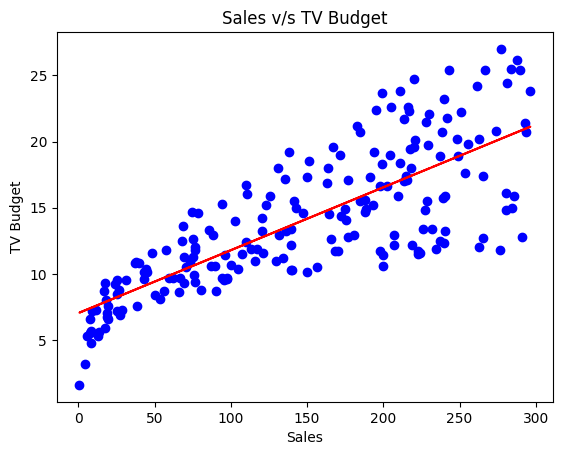

In [196]:
# create an empty linear regression model 
tv_model = LinearRegression()

# to create the model, we use fit(x,y)
tv_model.fit(x,y)

y_pred = tv_model.predict(x)
plt.scatter(x,y,color = 'b')
plt.plot(x,tv_model.predict(x),color = 'r')
plt.title('Sales v/s TV Budget')
plt.xlabel('Sales')
plt.ylabel('TV Budget')
plt.show()


## Radio Simple Linear Model

In [197]:
x = data.iloc[:,1].values
y = data.iloc[:,3].values
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)

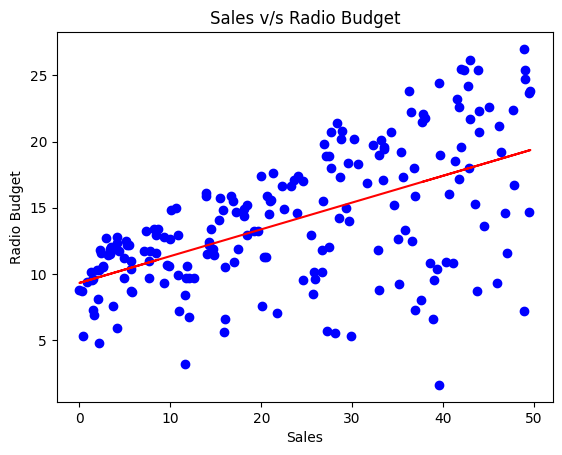

In [198]:
# create an empty linear regression model 
radio_model = LinearRegression()

# to create the model, we use fit(x,y)
radio_model.fit(x,y)

y_pred = radio_model.predict(x)
plt.scatter(x,y,color = 'b')
plt.plot(x,radio_model.predict(x),color = 'r')
plt.title('Sales v/s Radio Budget')
plt.xlabel('Sales')
plt.ylabel('Radio Budget')
plt.show()


In [199]:
# The coefficients
print('Coefficients: \n', radio_model.coef_)

Coefficients: 
 [[0.20249578]]


## Newspaper Simple Linear model

In [200]:
x = data.iloc[:,2].values
y = data.iloc[:,3].values
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)

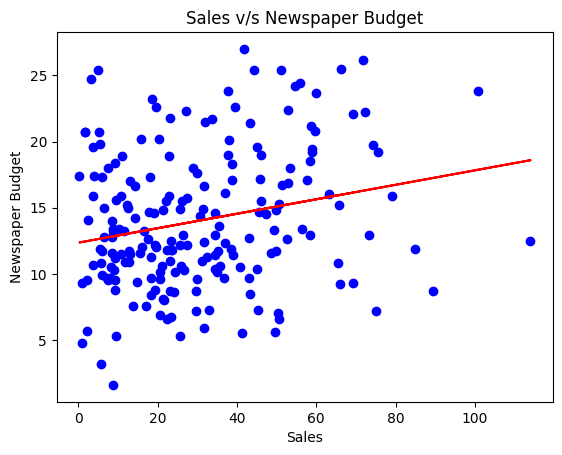

In [201]:
# create an empty linear regression model 
newspaper_model = LinearRegression()

# to create the model, we use fit(x,y)
newspaper_model.fit(x,y)

y_pred = newspaper_model.predict(x)
plt.scatter(x,y,color = 'b')
plt.plot(x,newspaper_model.predict(x),color = 'r')
plt.title('Sales v/s Newspaper Budget')
plt.xlabel('Sales')
plt.ylabel('Newspaper Budget')
plt.show()


In [202]:
# The coefficients
print('Coefficients: \n', newspaper_model.coef_)

Coefficients: 
 [[0.0546931]]


## Multiple Linear Regression

In [203]:
X = data.iloc[:,[0, 1, 2]].values
X[1:4]

array([[ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5]])

In [204]:

y = data.iloc[:,3].values
y = y.reshape(-1, 1)
X = X.reshape(-1, X.shape[1])

# create an empty linear regression model like below and give it a good variable name
advertising_model = LinearRegression()

# to create the model, we use fit(x,y)
advertising_model.fit(X,y)


print('Intercept: \n', advertising_model.intercept_)
print('Coefficients: \n', advertising_model.coef_)


Intercept: 
 [2.93888937]
Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]


## Training and test samples

In [205]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)

Training data: (150, 3) (150, 1)
Test data: (50, 3) (50, 1)


### Feature Scaling

Feature scaling is the process of manipulating feature values so that they all fall within a similar range. If you have one feature being anywhere between 0-1000 and another feature being anywhere from 0-0.1, then you have a scaling issue. The first feature would naturally be prioritized, as it contributes the most to error.

Therefore, we want to ensure that all features are on the same scale. This is the process of feature scaling. There are two ways we can scale features: normalization, or standardization.

Standardization is a type of scaling that will shift your values to have a mean of 0 and a standard deviation of 1. This way, most of your features will be between -1 and 1. However, it is possible for some outliers to go a bit higher. Standardisation is a great form of feature scaling, but works best with features that follow a Gaussian distribution.

Normalization is simply the process of (a) subtracting the minimum value of the dataset and (b) dividing by the range of the dataset (which is max - min). This ensures that your smallest value is always 0 and your largest value is always 1. This is less optimal than standardization, but doesn't require your data to be a Gaussian.

With all this in mind, let's take a look at the statistical distribution of our data.

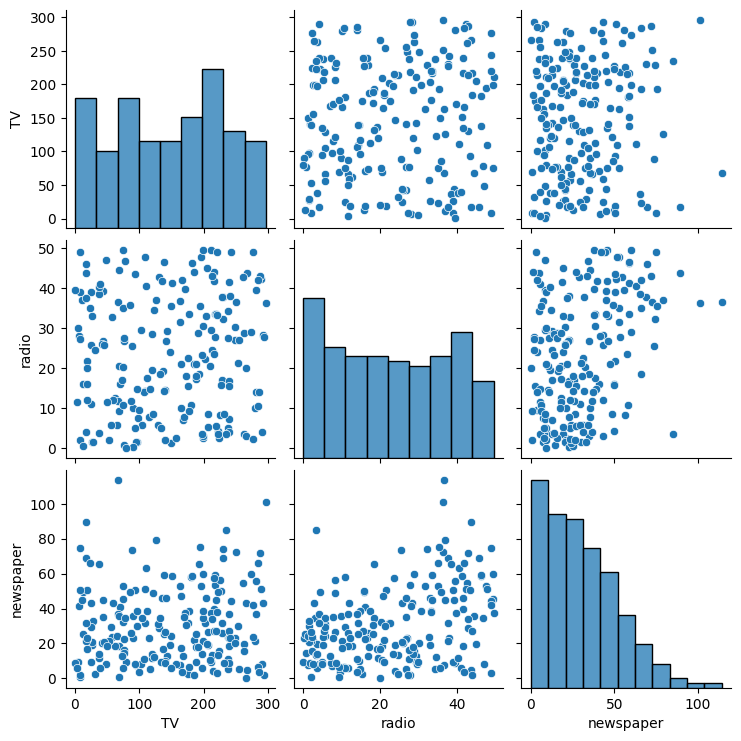

In [206]:
# Let's take a look at the distribution here
sns.pairplot(data=data.drop('sales', axis=1))

Looks like the features don't follow a Gaussian distribution. Let's Normalize our data using MinMaxScaler. Note that we fit it on the training set - we don't want to fit anything on the test set.

In [207]:
# Fit the scaler on train data
sc = MinMaxScaler()
sc.fit(X_train)

# Apply the scaler on train and test data
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

Using a 0.25 test size split our data of 200 items into a training set of 150 observations and three columns, and a test set of 50 observations. 

We can use this to evaluate our model.


### Now we’ll fit the model on the training data:


In [208]:
# fit a model
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

# Create line coordinates
X_line = np.empty(X_test.shape)
for i in range(X_test.shape[1]):
    X_line[:, i] = np.linspace(np.min(X_test[:,i]), np.max(X_test[:,i]), num=X_test.shape[0])
y_line = lm.predict(X_line)

print('Intercept: \n', lm.intercept_)
print('Coefficients: \n', lm.coef_)


Intercept: 
 [2.97233293]
Coefficients: 
 [[13.74961304  9.32238929 -0.59570097]]


In [209]:
predictions[0:5]


array([[11.59495441],
       [ 9.02978798],
       [14.01218056],
       [10.02484701],
       [18.60436603]])

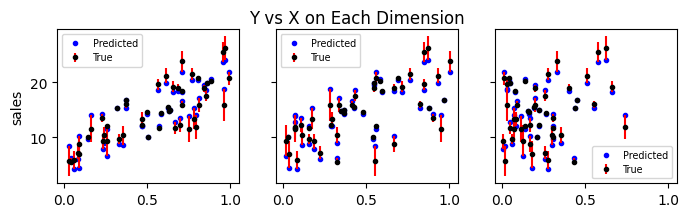

In [214]:
## Plot the errors
fig, ax = plt.subplots(1, X_test.shape[1], sharey=True, sharex=True, figsize=(8,2))
fig.suptitle("Y vs X on Each Dimension")
ax[0].set_ylabel(data.columns[3])

# Plot Line of Best Fit
# for i in range(X_test.shape[1]):
#     ax[i].plot(X_line[:,i], y_line[:,0])
#     ax[i].set_xlabel(data.columns[i])

# Get values for the error bar
error_bar_values = np.abs((y_test-predictions)[:,0])

# Plot error bars (should be no error)
for i in range(X_test.shape[1]):
    ax[i].errorbar(X_test[:, i], y_test[:, 0], yerr=error_bar_values, fmt='.k', ecolor='red', label='True')
    ax[i].scatter(X_test[:,i], predictions[:,0], c='b', marker='.', label='Predicted')
    ax[i].legend(loc='best', fontsize='x-small')

The red lines indicate the error of the prediction from the actual observations. The black dots represent true values, and the blue dots represent predicted values. You will notice that, at the end of the red lines, either at the top or bottom, is a blue dot. In other words, you can read the red error line as the distance deviated from the true values. The reason why there is a red line either side of the black dot is to show that the error may be within that line, either above or below.

Sklearn's LinearRegression provides the R squared score for its models:

In [211]:
print ("Score:", model.score(X_test, y_test))


Score: 0.9287411111105219


This score is quite close to 1, which suggests that our model fits our observations quite well.